In [114]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Data
dataset = pd.read_csv(r'data/IMDB_Top_1000_TV_shows.csv')

In [115]:
df = dataset

df

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2221861,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161317,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543016,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222844,2006
4,tt5152226,Tree of Life,Drama,9.4,11557,2014
...,...,...,...,...,...,...
995,tt8910922,Solar Opposites,"Adventure, Animation, Comedy",7.9,32339,2020
996,tt5368542,The Exorcist,"Drama, Horror, Mystery",7.9,32307,2016
997,tt11379026,Ghosts,"Comedy, Fantasy",7.9,32212,2021
998,tt14824792,Ted,Comedy,7.9,31469,2024


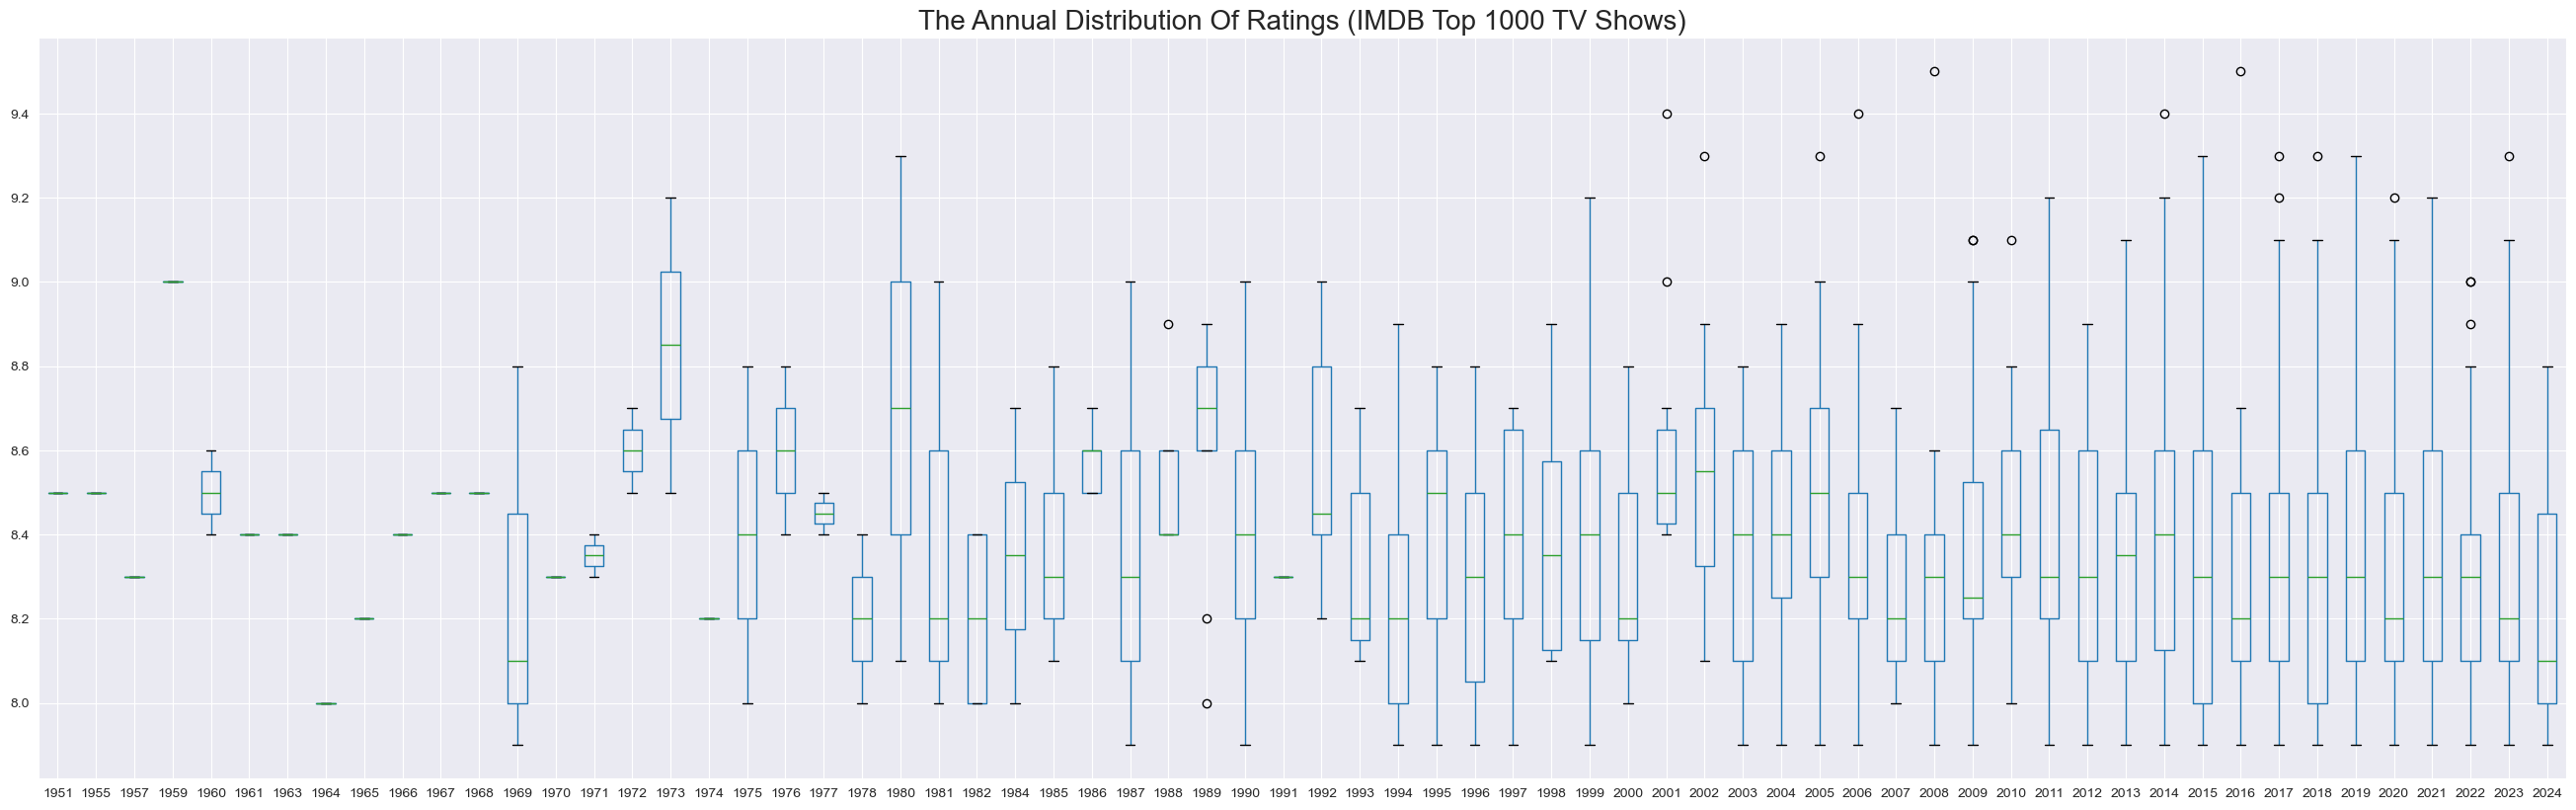

In [116]:
# Plotting the trends
df.boxplot(column='averageRating', by='releaseYear', figsize=(32, 10))

plt.title('The Annual Distribution Of Ratings (IMDB Top 1000 TV Shows)', fontsize=20)
plt.suptitle('')
plt.xlabel('')
plt.show()

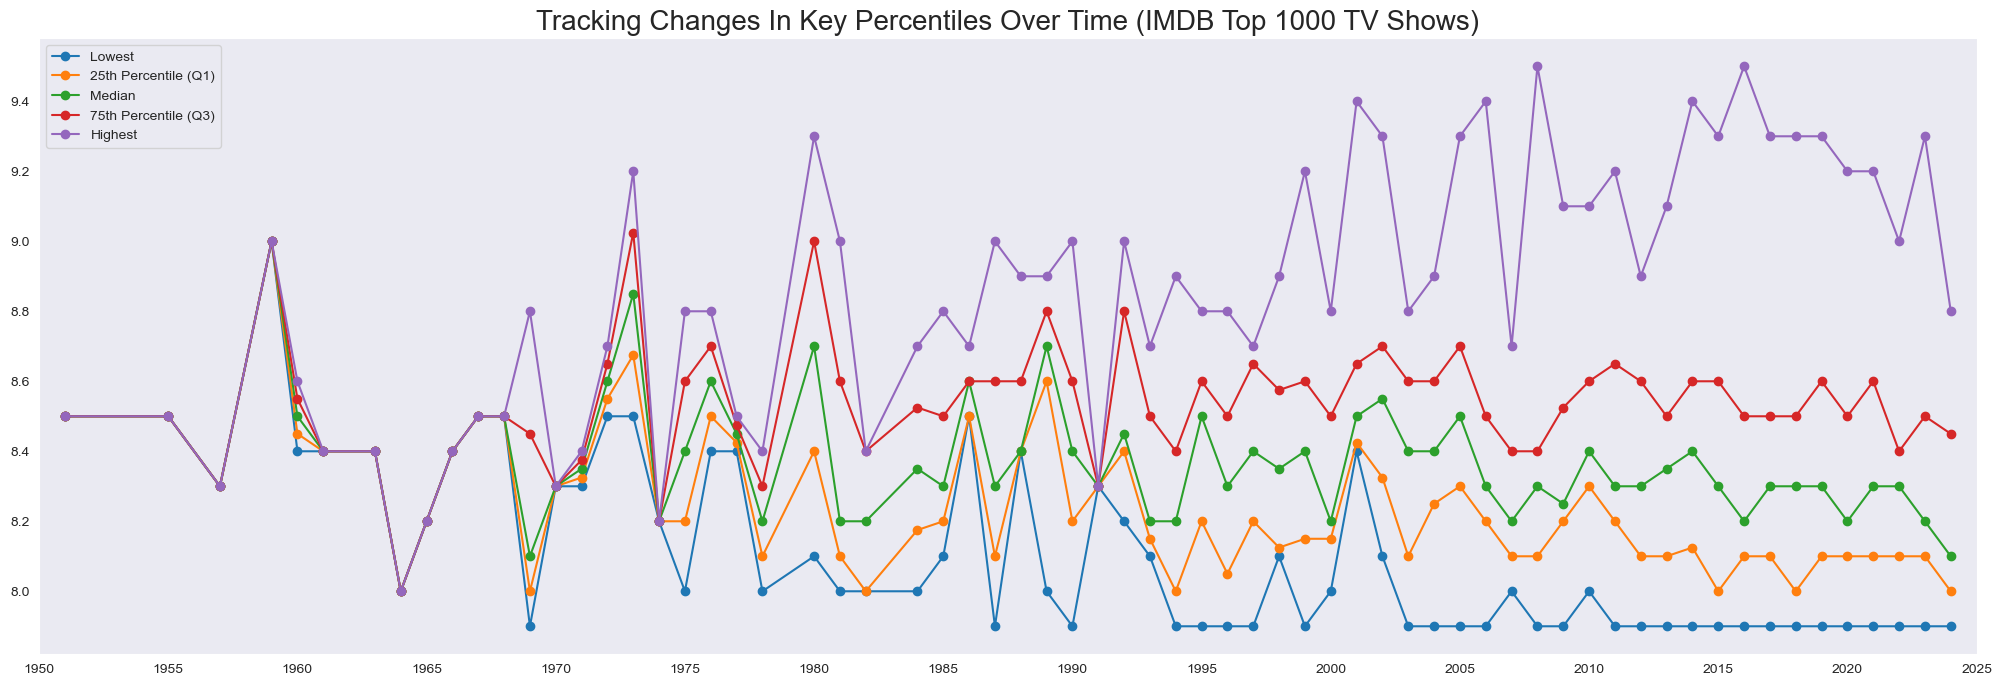

In [117]:
# Group by 'releaseYear' and calculate the percentiles
rating_trends = df.groupby('releaseYear')['averageRating'].agg(
    lowest='min',
    Q1='quantile',
    median='median',
    Q3='quantile',
    highest='max'
).reset_index()

# Calculate 25% (Q1) and 75% (Q3)
rating_trends['Q1'] = df.groupby('releaseYear')['averageRating'].quantile(0.25).values
rating_trends['Q3'] = df.groupby('releaseYear')['averageRating'].quantile(0.75).values

# Plotting the trends
plt.figure(figsize=(25, 8))
plt.plot(rating_trends['releaseYear'], rating_trends['lowest'], label='Lowest', marker='o')
plt.plot(rating_trends['releaseYear'], rating_trends['Q1'], label='25th Percentile (Q1)', marker='o')
plt.plot(rating_trends['releaseYear'], rating_trends['median'], label='Median', marker='o')
plt.plot(rating_trends['releaseYear'], rating_trends['Q3'], label='75th Percentile (Q3)', marker='o')
plt.plot(rating_trends['releaseYear'], rating_trends['highest'], label='Highest', marker='o')

# Adjust the x-axis ticks to show every 5 years
plt.xticks(ticks=range(min(rating_trends['releaseYear'] - 1), max(rating_trends['releaseYear']) + 2, 5))


# Adding labels and title
plt.title('Tracking Changes In Key Percentiles Over Time (IMDB Top 1000 TV Shows)', fontsize=20)
plt.xlim(1950, 2025)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()

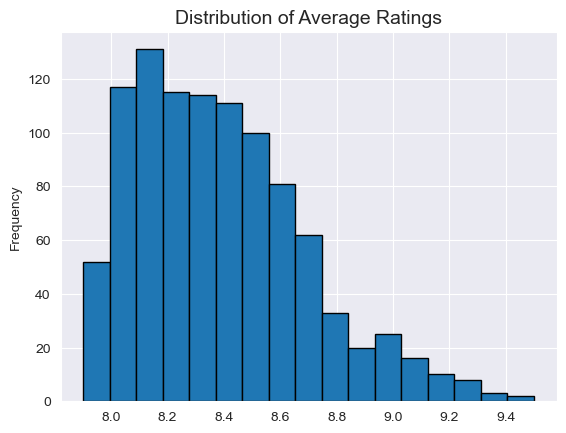

In [118]:
# Distribution of Average Ratings
df['averageRating'].plot(kind='hist', bins=17, edgecolor='black')

plt.title('Distribution of Average Ratings', fontsize=14)
plt.show()

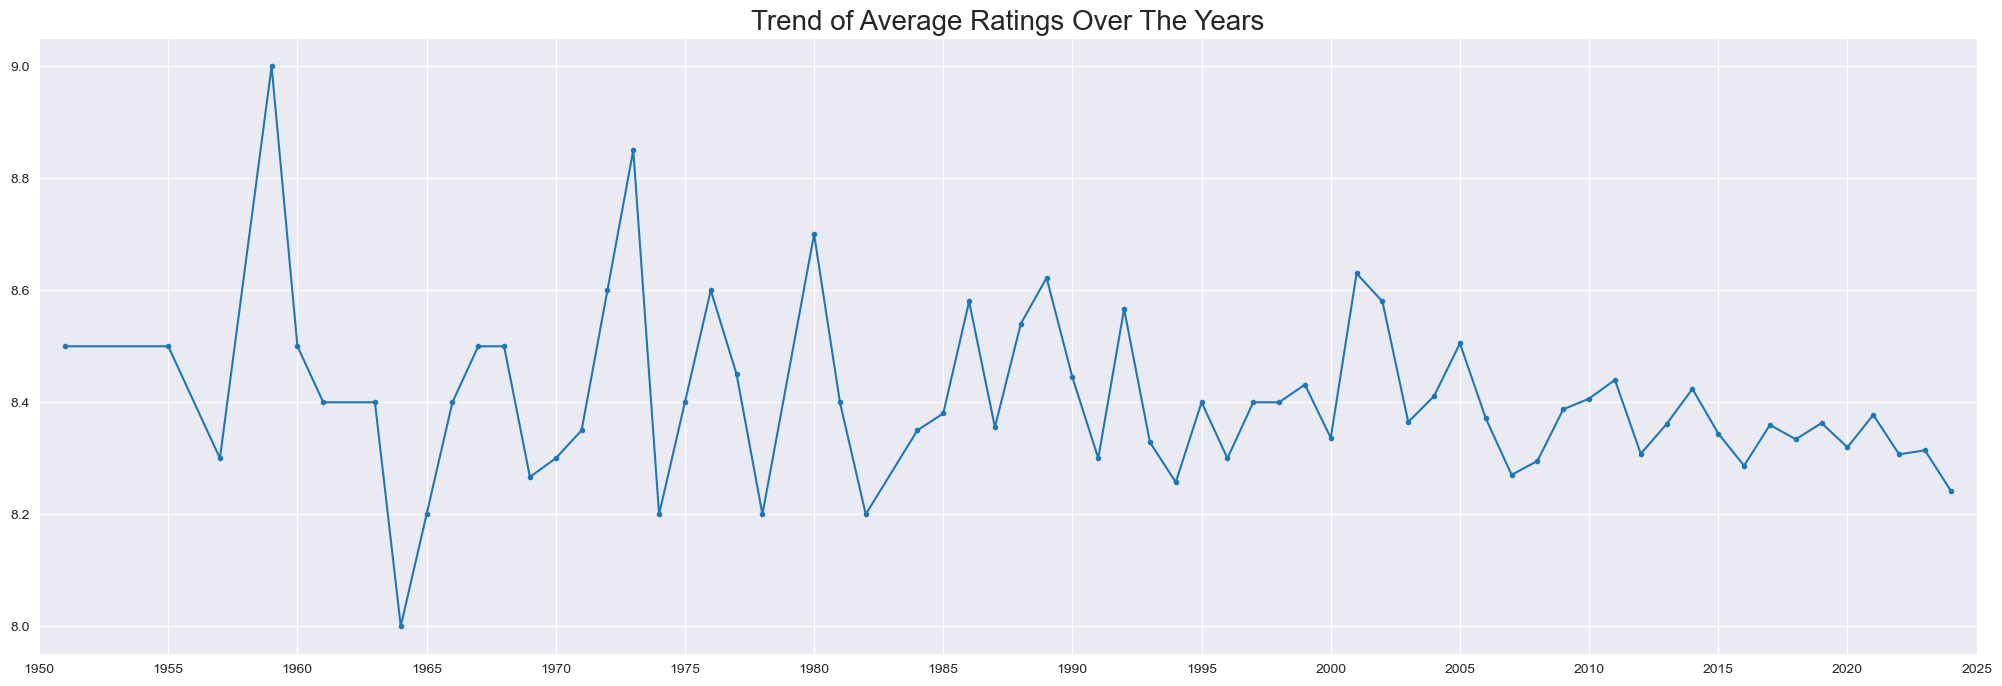

In [119]:
plt.figure(figsize=(25, 8))
plt.xlim(1950, 2025)
df.groupby('releaseYear')['averageRating'].mean().plot(kind='line', marker='.')

# Adjust the x-axis ticks to show every 5 years
plt.xticks(ticks=range(min(rating_trends['releaseYear'] - 1), max(rating_trends['releaseYear']) + 2, 5))

plt.grid(True)
plt.title('Trend of Average Ratings Over The Years', fontsize=20)
plt.ylabel('')
plt.xlabel('')
plt.show()

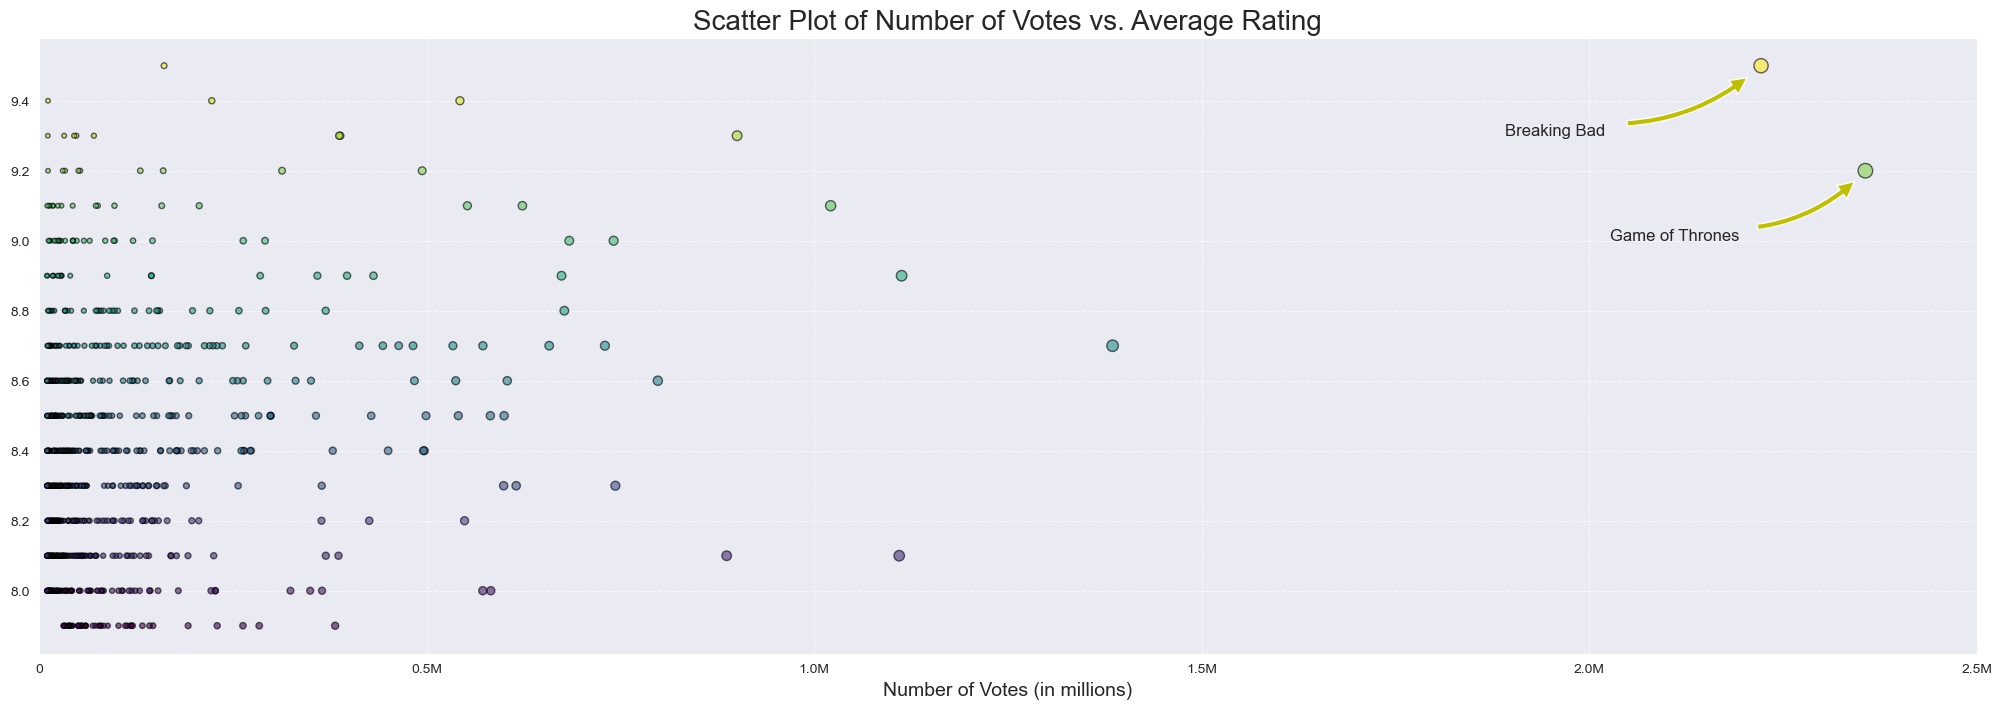

In [120]:
from matplotlib.ticker import FuncFormatter

# Create a function to format the x-axis labels
def millions_formatter(x, _):
    return f'{x / 1_000_000:.1f}M' if x >= 500_000 else str(int(x))  # Format as '1.5M', '2.0M', etc.

# Create a scatter plot with enhancements
plt.figure(figsize=(25, 8))

# Plot marker size based on numVotes
scatter = plt.scatter(df['numVotes'], df['averageRating'], 
                      alpha=0.6, c=df['averageRating'], cmap='viridis', 
                      s=(df['numVotes'] / df['numVotes'].max()) * 100 + 10, edgecolor='k')

# Define criteria for outliers; you can adjust these as needed
outlier_conditions = (
    (df['averageRating'] >= 9.0) & (df['numVotes'] >= 2000000)  # Example condition for high-rated shows
)

# Select the outliers based on defined conditions
outliers = df[outlier_conditions]

# Annotate the outliers
for index, row in outliers.iterrows():
    plt.annotate(row['title'], 
                 xy=(row['numVotes'], row['averageRating']), 
                 xytext=(row['numVotes'] - 330000, row['averageRating'] - 0.2),  # Adjusted for reverse arrow direction
                 arrowprops=dict(facecolor='y', shrink=0.11, connectionstyle='arc3,rad=0.2'),  # Use angle3 with specified angles
                 fontsize=12)

# Set the title and labels with appropriate font sizes
plt.title('Scatter Plot of Number of Votes vs. Average Rating', fontsize=20)
plt.xlabel('Number of Votes (in millions)', fontsize=14)
plt.ylabel('')

# Set limiter
plt.xlim(0, 2_500_000)

# Apply the millions formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

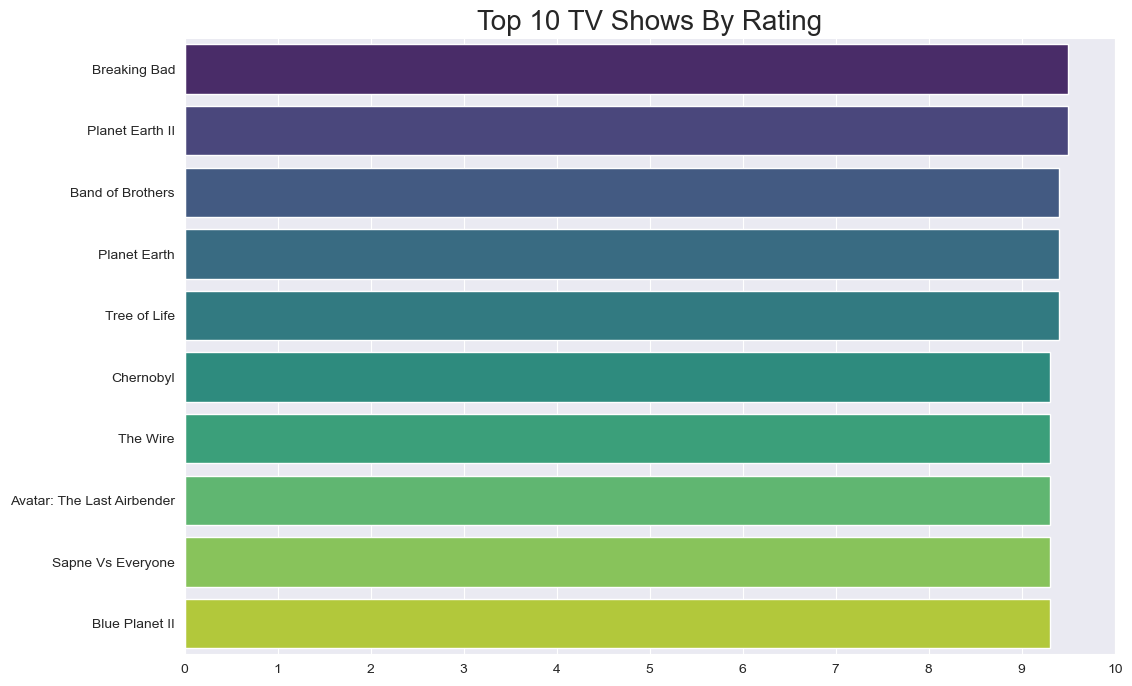

In [121]:
# Define top 10 shows by rating
top_rat = df.nlargest(10, 'averageRating')

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rat, x='averageRating', y='title', hue='title',  palette='viridis')


plt.xlim([0, 10])
plt.xticks(ticks=range(0, 11))

plt.title('Top 10 TV Shows By Rating', fontsize=20)
plt.ylabel('')
plt.xlabel('', fontsize=14)
plt.show()

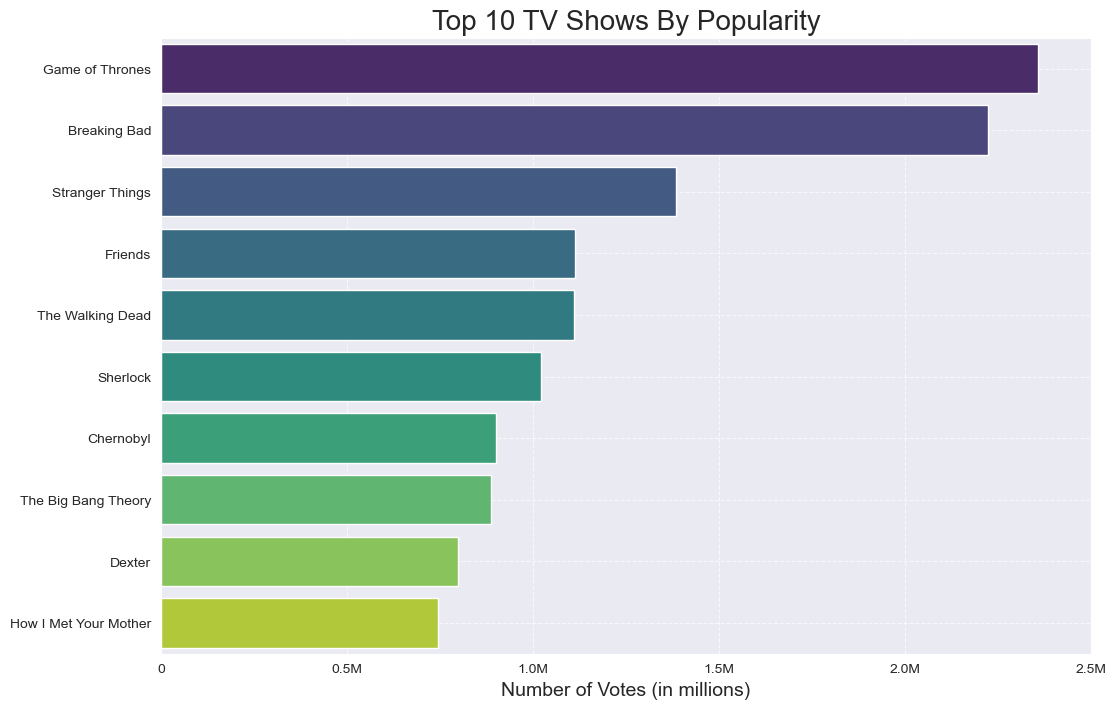

In [122]:
# Define top 10 shows by popularity
top_num = df.nlargest(10, 'numVotes')

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_num, x='numVotes', y='title', hue='title',  palette='viridis')

plt.title('Top 10 TV Shows By Popularity', fontsize=20)
plt.ylabel('')
plt.xlabel('Number of Votes (in millions)', fontsize=14)

# Set limiter
plt.xlim(0, 2_500_000)

# Apply the millions formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [123]:
# Assuming genres are separated by commas
df['genres'] = df['genres'].str.split(',')

# Explode the genres into separate rows
df_exploded = df.explode('genres')

# Strip any whitespace from the genre names
df_exploded['genres'] = df_exploded['genres'].str.strip()

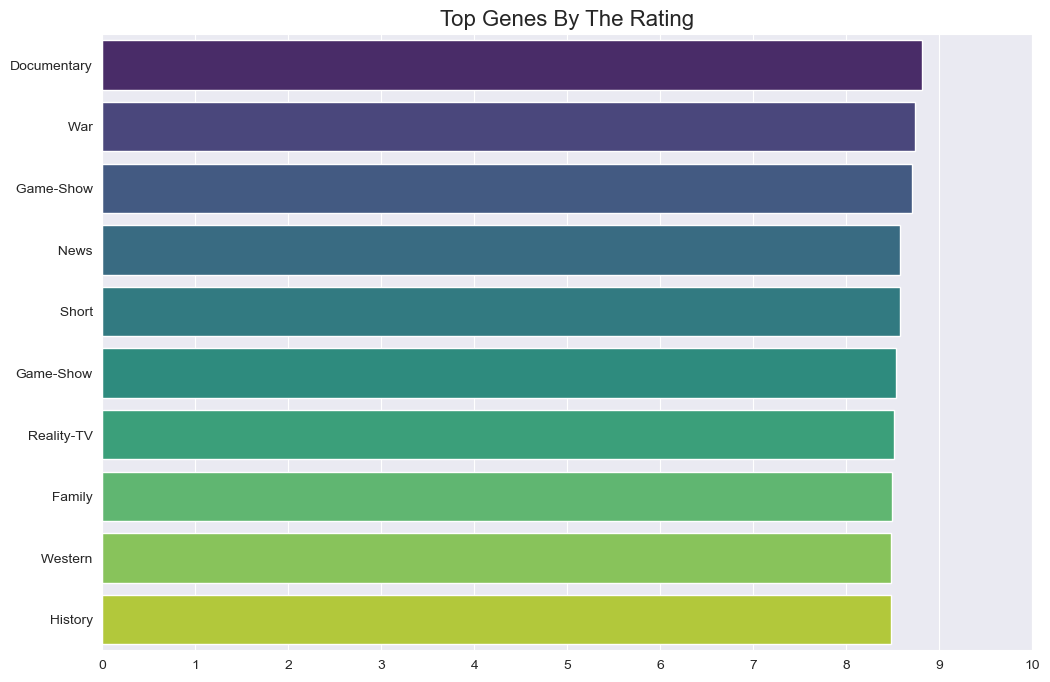

In [131]:
# Calculate the mean average rating for each genre and select the top 10
genre_ratings = df.explode('genres').groupby('genres')['averageRating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_ratings, x='averageRating', y='genres', hue='genres', palette='viridis')

plt.xlim([0, 10])  # Set x-axis limits
plt.xticks(ticks=range(0, 11))  # Set x-ticks
plt.xlabel('')
plt.ylabel('')
plt.title('Top Genes By The Rating', fontsize=16)  # Set title
plt.show() 


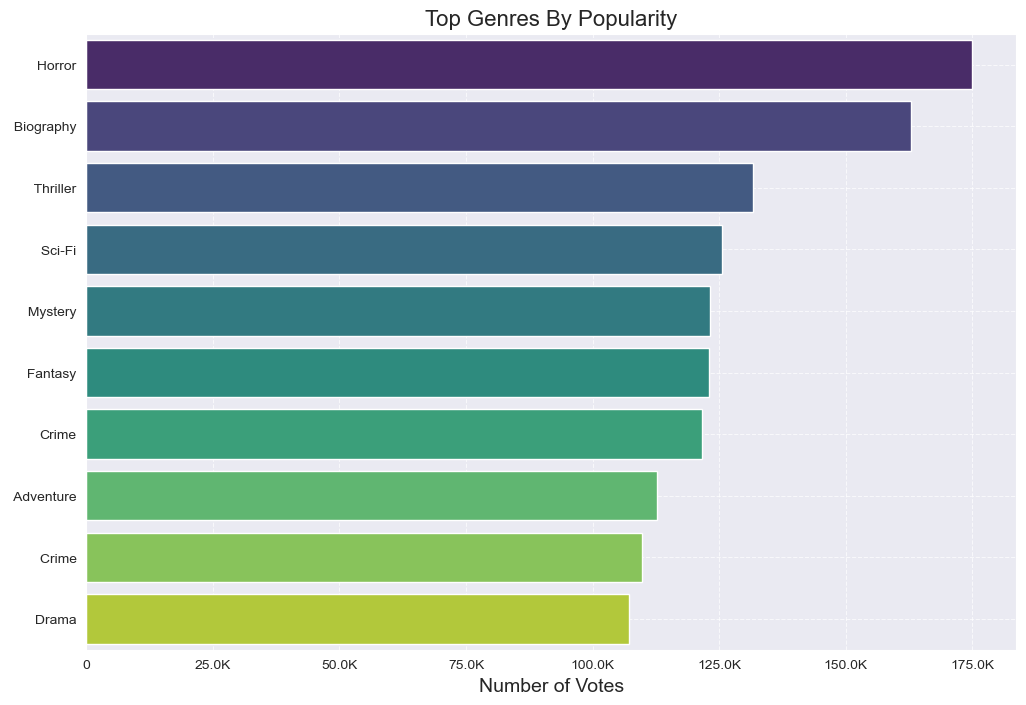

In [130]:
# Calculate the mean average votes for each genre and select the top 10
genre_votes = df.explode('genres').groupby('genres')['numVotes'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_votes, x='numVotes', y='genres', hue='genres', palette='viridis')

# Create a function to format the x-axis labels
def millions_formatter(x, _):
    return f'{x / 1_000:.1f}K' if x >= 25_000 else str(int(x))  # Format as '25K', '50K', etc.

plt.title('Top Genres By Popularity', fontsize=16)  # Set title
plt.ylabel('')
plt.xlabel('Number of Votes', fontsize=14)

# Set limiter
#plt.xlim(0, 2_500_000)

# Apply the millions formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)


plt.show() 

<Axes: xlabel='releaseYear'>

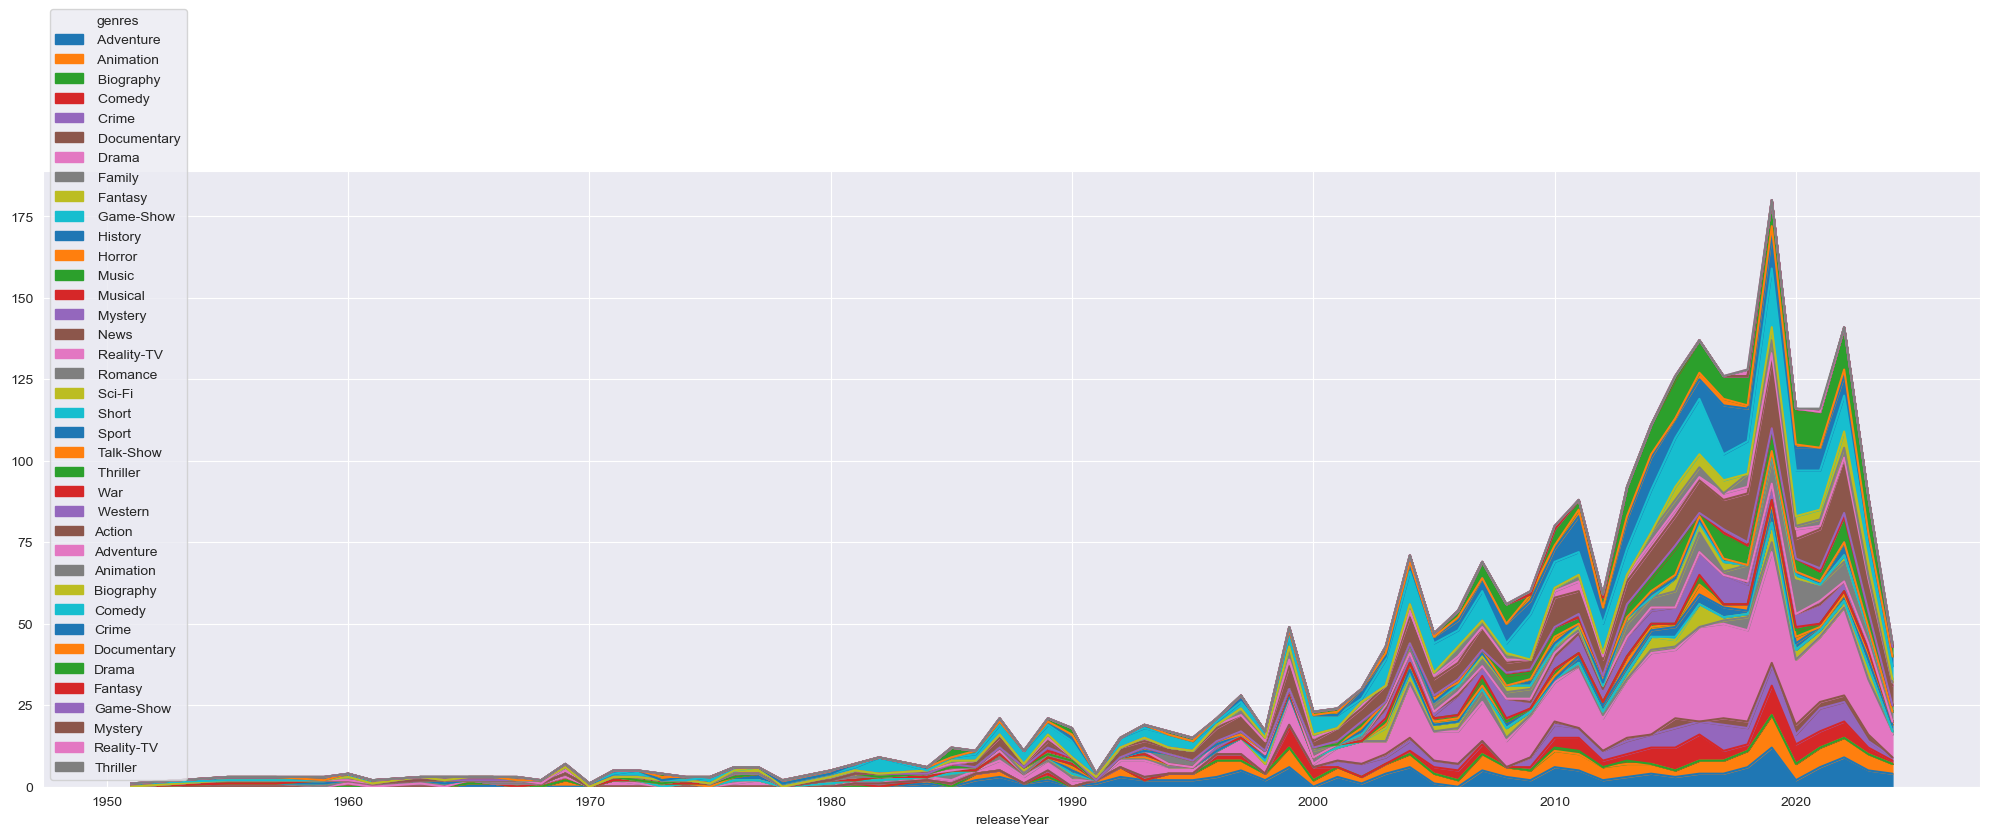

In [126]:
genre_counts = df.explode('genres').groupby(['releaseYear', 'genres']).size().unstack(fill_value=0)
genre_counts.plot(kind='area', stacked=True, figsize=(25, 8))


In [127]:

# Get the top 10 genres from the exploded DataFrame
genre_counts

genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,...,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Game-Show,Mystery,Reality-TV,Thriller
releaseYear,,,,,,,,,,,,,,,,,,,,,
1951,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1955,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1957,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1959,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1960,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2,5,0,6,3,3,20,0,3,0,...,3,14,7,1,10,1,0,0,0,0
2021,6,6,0,5,7,2,20,0,2,0,...,3,12,7,0,11,0,0,0,0,1
2022,9,6,0,5,6,2,27,0,2,0,...,5,11,6,2,13,0,0,0,0,0


In [128]:
genre_counts = df_exploded['genres'].value_counts()

genre_counts

genres
Drama          611
Comedy         383
Crime          244
Action         236
Adventure      183
Animation      182
Mystery        111
Romance         86
Thriller        72
Fantasy         58
History         47
Documentary     46
Biography       39
Family          36
Horror          30
Sci-Fi          29
Music           19
Sport           17
War             14
Talk-Show       13
Reality-TV       9
Game-Show        6
Western          6
Musical          6
News             4
Short            4
Name: count, dtype: int64